# Vector symbolic architectures (VSA) preambles

This notebook just explore the basic concepts upon which vector symbolic architectures (VSA) are built. VSA are also known as hyperdymensional computing (HC). The notebook mostly focuses on the understanding the main properties of VSA, but it also contains some examples to illustrate how they work.

## References

The [Hyperdymensional computing](https://www.hd-computing.com/) website is a good resource to learn more about HC/VSA. There is also a [tutorial](https://www.tu-chemnitz.de/etit/proaut/workshops_tutorials/vsa_ecai20/rsrc/vsa_slides.pdf) by Peer Neubert, Kenny Schlegel and Stefan Schubert worth taking a look at.

## Getting basic packages installed

In [6]:
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Generating random high-dimensional vectors

There a different variants of HC. In this notebook we will focus on vectors expressed over real number interval [-1, +1]. We can generate such vectors using `numpy` module as follows:

In [2]:
import numpy as np

# Creates a 2D array with _n_ vectors and _l_ elements each, where the elements are random numbers in [-1,1] range.
def create_random_vectors(n, l):
    return np.random.uniform(-1, 1, (n, l))

## Computing distance simmilarities between vectors

The next thing we need is a way to compute similarity between two vectors. The easy way is to use the cosine distance. We can do this by taking the dot product of the two vectors and dividing it by the product of their lengths and substracting it from 1.

$$
sim(\vec{v}, \vec{w}) = \frac{\vec{v} \cdot \vec{w}}{\|\vec{v}\| \times \|\vec{w}\|}
$$

This can be computed between all pairs as follows:

In [3]:
# Calculates the cosine similarity between all pairs of vectors in the input array.
def similarity(rd):
    ds = rd.dot(rd.transpose())
    n = np.linalg.norm(rd, axis=1)
    p = np.array([x*y for x in n for y in n]).reshape(ds.shape)
    #cds = 1 - ds / p
    return ds/ p # cds cds


## Distance distributions and quasi ortogonality

A key property that HC/VSA is that as dimentions grow large enough the distance between randomly generated vectors tend to show the property of quasi ortogonality between any possible pair. To empirically illustrate this point, we will generate a set of random vectors and plot their distances against each other.

In [4]:
samples = 10000
sweep = [10, 100, 1000, 10000, 100000, 500000] 
dds = [similarity(create_random_vectors(samples, s)) for s in sweep]

Then we just plot the histogram of the distances for each of the sweeps of vector dimensions.

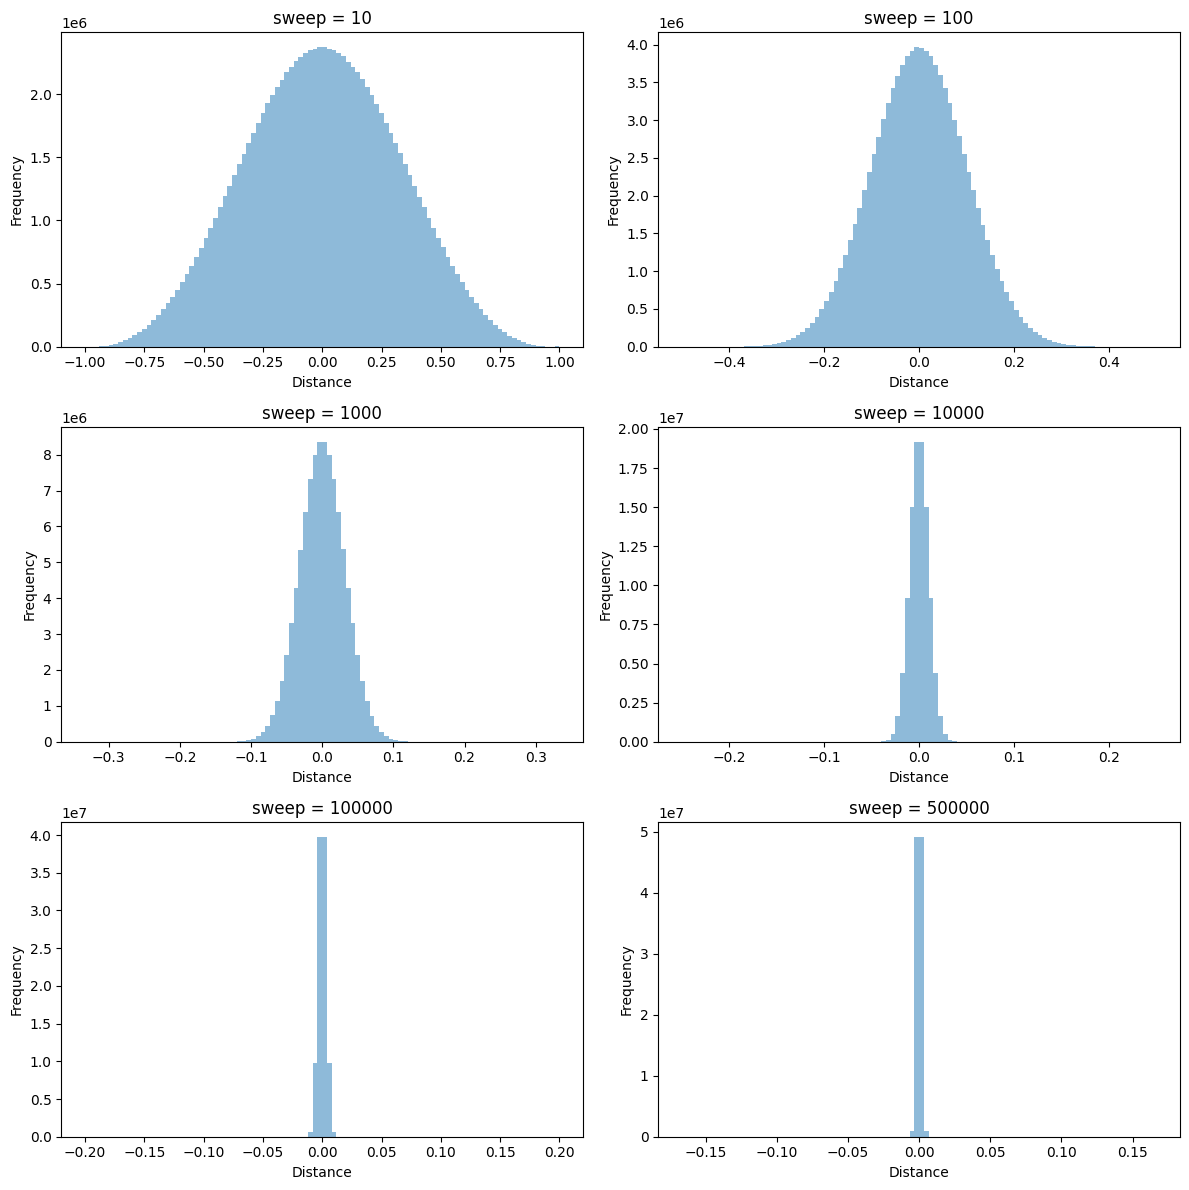

In [5]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

cnt = 1
for s, ds, ax in zip(sweep, dds, axs.flatten()):
    ax.hist(ds.flatten(), bins=100, alpha=0.5, range=(-1/cnt, 1/cnt))
    ax.set_title(f'sweep = {s}')
    ax.set_xlabel('Distance')
    ax.set_ylabel('Frequency')
    cnt += 1
    
# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

## TBC